# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

import memory_profiler as mp
%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [27]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
151 µs ± 36.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 120.21 MiB, increment: 0.22 MiB


SIZE:  1000
Timing: 
18.5 ms ± 1.06 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 143.11 MiB, increment: 22.90 MiB


SIZE:  10000
Timing: 
1.86 s ± 79.9 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2282.38 MiB, increment: 2203.62 MiB




***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [3]:
from main import relative_error,absolut_error

print("przykładowe użycia funkcji:\n")
print("absolut_error od [[4,3,3,3], [1,1,1,1]] i 1 to:\n {}".format(absolut_error([[4,2,3,300],[1,1,1,1]],1)))
print("relative_error od [[4,3,3,3], [1,1,1,1]] i 1 to:\n {}".format(relative_error([[4,2,3,300],[1,1,1,1]],1)))

przykładowe użycia funkcji:

absolut_error od [[4,3,3,3], [1,1,1,1]] i 1 to:
 [[  3   1   2 299]
 [  0   0   0   0]]
relative_error od [[4,3,3,3], [1,1,1,1]] i 1 to:
 [[0.75       0.5        0.66666667 0.99666667]
 [0.         0.         0.         0.        ]]


***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  

1)
Czysto matematycznie powinnyśmy otrzymać 0 (c - c = 0), lecz komputery posłygują się
 zapisem liczb binarnym zmiennoprzecinkowym, więc wyniki będą się wahały dla niektórych wartości


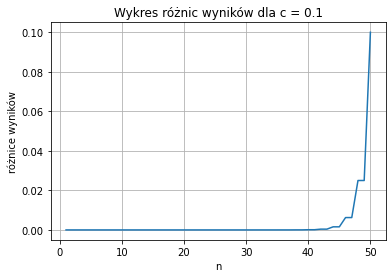

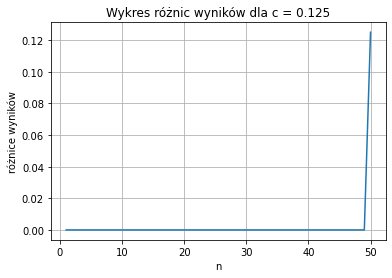

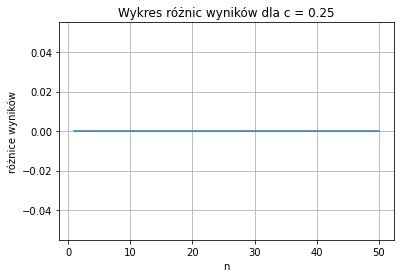

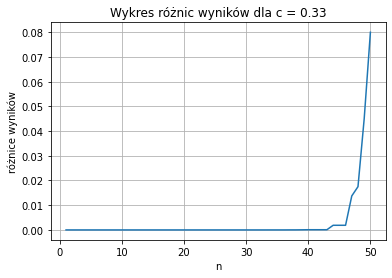

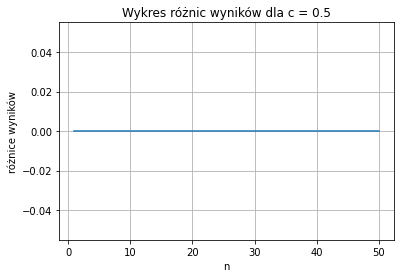

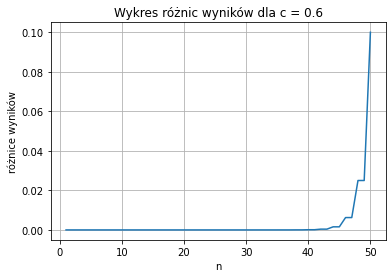

2)
W zapisie binarnym liczby, których części ułamkowej nie da się zapisać jako sumy ujemnych potęg dwójki
W naszym przypadku są to 0.1, 0.33 oraz o.6)

3)
Wyniki różnią przez sposób reprezentacji liczb, z któego korzytają
komputery - niektóre liczby nie mogą być w pełni poprawnie reprezentowane w postaci biarnej (np 1/3 lub 1/10)liczby te są jedynie przybliżeniami. Na dodatek te liczby są zapisywane zmiennoprzecinkowo, co oznacza
że przy wykonywaniu dodawania/odejmowania konieczne jest sprowadzenie liczb do wspólnego wykładnika,
na czym też można stracić na dokładności (trcenie bitów przeznaczonych wcześniej na mantysę (część ułamkową)
(przy kolejności działań 2^n + c - 2^n , c bardzo traci na dokładności zapisu przy większych n, tym bardziej
jeśli samo zapianie mantysy c wymaga wielu bitów (co się dzieje przy liczbach typu 1/10 i 1/3) 

4)
Występują błedy zaokrągleń i błedy reprezentacji
5)
Zwiększenie ilości bitów przeznaczonych na reprezentację liczby


In [4]:
from main import p_diff

print("1)\nCzysto matematycznie powinnyśmy otrzymać 0 (c - c = 0), lecz komputery posłygują się\n "
      "zapisem liczb binarnym zmiennoprzecinkowym, więc wyniki będą się wahały dla niektórych wartości")
n = np.linspace(1,50,50)
c = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]

for i in c:
    result = []
    for j in n:
        result.append(p_diff(int(j), i))
    result = np.array(result)
    plt.plot(n,result)
    plt.title("Wykres różnic wyników dla c = {}".format(i))
    plt.xlabel("n")
    plt.ylabel("różnice wyników")
    plt.grid()
    plt.show()

print("2)\nW zapisie binarnym liczby, których części ułamkowej nie da się zapisać jako sumy ujemnych potęg dwójki\n"
      "W naszym przypadku są to 0.1, 0.33 oraz o.6)\n")

print("3)\nWyniki różnią przez sposób reprezentacji liczb, z któego korzytają\n"
      "komputery - niektóre liczby nie mogą być w pełni poprawnie reprezentowane w postaci biarnej (np 1/3 lub 1/10)"
      "liczby te są jedynie przybliżeniami. Na dodatek te liczby są zapisywane zmiennoprzecinkowo, co oznacza\n"
      "że przy wykonywaniu dodawania/odejmowania konieczne jest sprowadzenie liczb do wspólnego wykładnika,\n"
      "na czym też można stracić na dokładności (trcenie bitów przeznaczonych wcześniej na mantysę (część ułamkową)\n"
      "(przy kolejności działań 2^n + c - 2^n , c bardzo traci na dokładności zapisu przy większych n, tym bardziej\n"
      "jeśli samo zapianie mantysy c wymaga wielu bitów (co się dzieje przy liczbach typu 1/10 i 1/3) \n")

print("4)\nWystępują błedy zaokrągleń i błedy reprezentacji")
print("5)\nZwiększenie ilości bitów przeznaczonych na reprezentację liczby")

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

e^10 obliczone z dokładnością N = 5.0 : 644.3333333333334
e^10 obliczone za pomocą numpy.exp: 22026.465794806718
błąd bezwzgędny równy: 21382.132461473386
błąd wzgędny równy: 0.970747311923039

e^10 obliczone z dokładnością N = 10.0 : 10086.573192239859
e^10 obliczone za pomocą numpy.exp: 22026.465794806718
błąd bezwzgędny równy: 11939.892602566859
błąd wzgędny równy: 0.5420702855281478

e^10 obliczone z dokładnością N = 15.0 : 20188.170595424563
e^10 obliczone za pomocą numpy.exp: 22026.465794806718
błąd bezwzgędny równy: 1838.2951993821553
błąd wzgędny równy: 0.08345847293466294

e^10 obliczone z dokładnością N = 20.0 : 21950.37884943194
e^10 obliczone za pomocą numpy.exp: 22026.465794806718
błąd bezwzgędny równy: 76.0869453747764
błąd wzgędny równy: 0.0034543419758568702

e^10 obliczone z dokładnością N = 25.0 : 22025.43166586263
e^10 obliczone za pomocą numpy.exp: 22026.465794806718
błąd bezwzgędny równy: 1.0341289440875698
błąd wzgędny równy: 4.694938142692829e-05



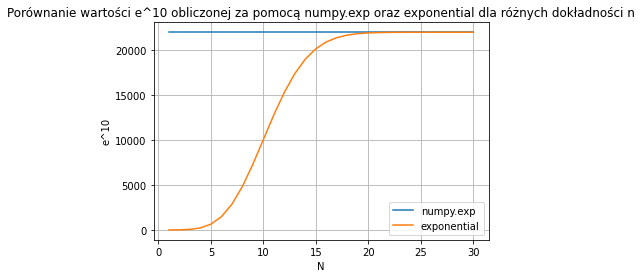

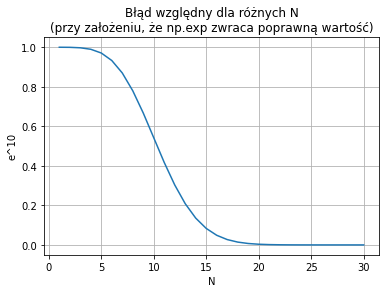

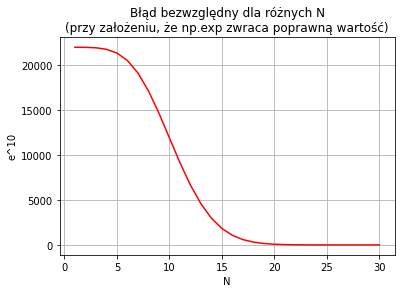


Jest to błąd metody (aby otrzymać dokładną watość należałoby wykonać nieskończenie wiele działań)

Jak widać na powyższych wykresch, błąd względny jak i bezwzględny maleją dla coraz większej dokładności n. Dla pewnego N
 spadek zmienszania się błędu spowalnia.


In [5]:
from main import exponential

n = np.linspace(5,25,5)
e10 = np.exp(10)

for i in n:
    ex = exponential(10,int(i))
    print("e^10 obliczone z dokładnością N = {} : {}".format(i,ex))
    print("e^10 obliczone za pomocą numpy.exp: {}".format(e10))
    print("błąd bezwzgędny równy: {}".format(absolut_error(e10,ex)))
    print("błąd wzgędny równy: {}\n".format(relative_error(e10,ex)))

#funkcje ablosut_error, relative_error i exponential nie przyjmują listy/wektora jako argument,
#więc tworzę zmienną zawierającą wyniki za pomocą list comprehension

n = np.linspace(1,30,30)
exp = []
rel = []
ab = []
for i in n:
    ex = exponential(10,int(i))
    ab.append(absolut_error(e10,ex))
    exp.append(ex)
    rel.append(relative_error(e10,ex))
    
fig, ax = plt.subplots()
ax.plot(n, np.array([e10]*30))
ax.plot(n, exp)
plt.title("Porównanie wartości e^10 obliczonej za pomocą numpy.exp oraz exponential dla różnych dokładności n")
plt.legend(["numpy.exp"] + ["exponential"])
plt.xlabel("N")
plt.ylabel("e^10")
plt.grid()
plt.show()


plt.plot(n, rel)
plt.title("Błąd względny dla różnych N\n(przy założeniu, że np.exp zwraca poprawną wartość)" )
plt.xlabel("N")
plt.ylabel("e^10")
plt.grid()
plt.show()

plt.plot(n, ab, "r")
plt.title("Błąd bezwzględny dla różnych N\n(przy założeniu, że np.exp zwraca poprawną wartość)" )
plt.xlabel("N")
plt.ylabel("e^10")
plt.grid()
plt.show()

print("\nJest to błąd metody (aby otrzymać dokładną watość należałoby wykonać nieskończenie wiele działań)\n")
print("Jak widać na powyższych wykresch, błąd względny jak i bezwzględny maleją dla coraz większej dokładności n. Dla pewnego N\n "
     "spadek zmienszania się błędu spowalnia.")

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

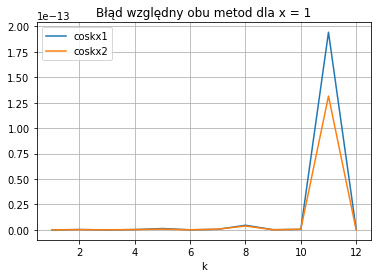

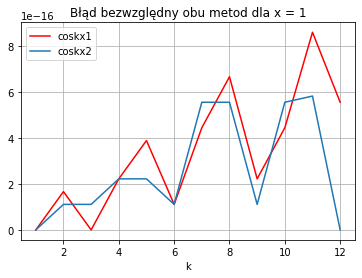

In [6]:
from main import coskx1, coskx2

#dla x = 1
k = np.linspace(1,12,12)
cosk1 = []
cosk2 = []
coskx = np.cos(k)
for i in k:
    cosk1.append(coskx1(int(i),1))
    cosk2.append(coskx2(int(i),1)[0])

ab1 = absolut_error(coskx,cosk1)
ab2 = absolut_error(coskx,cosk2)
rel1 = relative_error(coskx,cosk1)
rel2 = relative_error(coskx,cosk2)


fig2, ax2 = plt.subplots()

ax2.plot(k, rel1)
ax2.plot(k, rel2 )
plt.title("Błąd względny obu metod dla x = 1")
plt.legend(["coskx1"] + ["coskx2"] )
plt.xlabel("k")
plt.grid()
plt.show()

fig2, ax2 = plt.subplots()

ax2.plot(k, ab1, 'r')
ax2.plot(k, ab2 )
plt.title("Błąd bezwzględny obu metod dla x = 1")
plt.legend(["coskx1"] + ["coskx2"] )
plt.xlabel("k")
plt.grid()
plt.show()

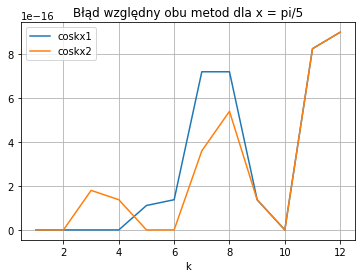

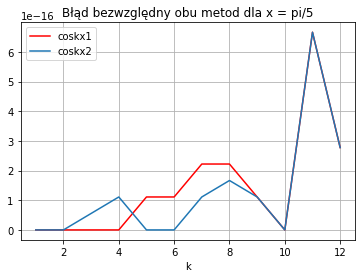

In [7]:
#dla x = pi/5

k = np.linspace(1,12,12)
cosk1 = []
cosk2 = []
coskx = np.cos(k*np.pi/5)
for i in k:
    cosk1.append(coskx1(int(i),np.pi/5))
    cosk2.append(coskx2(int(i),np.pi/5)[0])

ab1 = absolut_error(coskx,cosk1)
ab2 = absolut_error(coskx,cosk2)
rel1 = relative_error(coskx,cosk1)
rel2 = relative_error(coskx,cosk2)

fig2, ax2 = plt.subplots()

ax2.plot(k, rel1)
ax2.plot(k, rel2 )
plt.title("Błąd względny obu metod dla x = pi/5")
plt.legend(["coskx1"] + ["coskx2"] )
plt.xlabel("k")
plt.grid()
plt.show()

fig2, ax2 = plt.subplots()

ax2.plot(k, ab1, 'r')
ax2.plot(k, ab2 )
plt.title("Błąd bezwzględny obu metod dla x = pi/5")
plt.legend(["coskx1"] + ["coskx2"] )
plt.xlabel("k")
plt.grid()
plt.show()

In [8]:
print("Błędy względne oraz bezwzględne dla obu metod mocno się wahają, lecz metoda druga widocznie produkuje dokładniejsze wyniki")
print("Należy zauważyć jednak, że dla małych k, błędy te (zarówno względne jak i bezwzględne) są rzędu od 10^-13 do 10^-16")
print("Jako że obydwie funkcje działają rekurencyjnie, błędy dla poprzednich k wpłyną (przeniosą się) na dalsze k")

Błędy względne oraz bezwzględne dla obu metod mocno się wahają, lecz metoda druga widocznie produkuje dokładniejsze wyniki
Należy zauważyć jednak, że dla małych k, błędy te (zarówno względne jak i bezwzględne) są rzędu od 10^-13 do 10^-16
Jako że obydwie funkcje działają rekurencyjnie, błędy dla poprzednich k wpłyną (przeniosą się) na dalsze k


***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

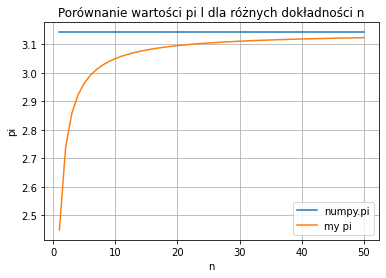

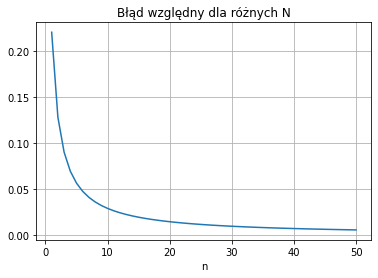

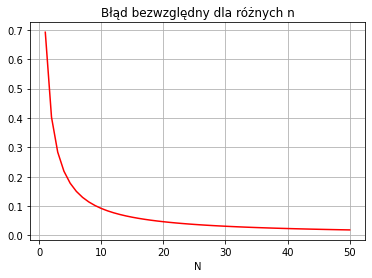

Mamy znów do czynienia z błędem metody - jak widać, wraz z wykonywaniem kolejnych działań otrzymujemy
wartość coraz to bliższą rzeczywistej
Jeszcze na dodatek dochodzi błąd zaokrągleń, jako że liczba pi nie ma skończonej reprezentacji


In [9]:
from main import pi
n = np.linspace(1,50,50)
m_pii = []
for i in n:
    pii = pi(int(i))
    m_pii.append(pii)

rel = relative_error([np.pi]*50,m_pii)
ab = absolut_error([np.pi]*50,m_pii)

fig, ax = plt.subplots()
ax.plot(n, [np.pi]*50)
ax.plot(n, m_pii)
plt.title("Porównanie wartości pi l dla różnych dokładności n")
plt.legend(["numpy.pi"] + ["my pi"])
plt.xlabel("n")
plt.ylabel("pi")

plt.grid()
plt.show()


plt.plot(n, rel)
ax.set_yscale('log')
plt.title("Błąd względny dla różnych N" )
plt.xlabel("n")
plt.grid()
plt.show()

plt.plot(n, ab, "r")
ax.set_yscale('log')
plt.title("Błąd bezwzględny dla różnych n" )
plt.xlabel("N")
plt.grid()
plt.show()

print("Mamy znów do czynienia z błędem metody - jak widać, wraz z wykonywaniem kolejnych działań otrzymujemy\n"
      "wartość coraz to bliższą rzeczywistej")
print("Jeszcze na dodatek dochodzi błąd zaokrągleń, jako że liczba pi nie ma skończonej reprezentacji")

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

In [10]:
for k in [5,7,10,12,15]:
    print('k: ', k)
    print("x: 2")
    print('Timing: ')
    saved_timing1 = %timeit -r 5 -n 10 -o coskx1(k,1)
    print('Memory usage: ')
    %memit coskx1(k,1)
    print('\n')

k:  5
x: 2
Timing: 
20.5 µs ± 1.24 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.25 MiB, increment: 0.10 MiB


k:  7
x: 2
Timing: 
54.9 µs ± 1.34 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.25 MiB, increment: 0.00 MiB


k:  10
x: 2
Timing: 
236 µs ± 672 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.25 MiB, increment: 0.00 MiB


k:  12
x: 2
Timing: 
653 µs ± 46.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.25 MiB, increment: 0.00 MiB


k:  15
x: 2
Timing: 
2.54 ms ± 29.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.25 MiB, increment: 0.00 MiB




In [11]:
for k in [5,7,10,12,15]:
    print('k: ', k)
    print("x: 2")
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o coskx2(k,1)
    print('Memory usage: ')
    %memit coskx2(k,1)
    print('\n')

print("Jak widać, metoda 1 obliczania cos jest bardziej czasochłonna")

k:  5
x: 2
Timing: 
30.4 µs ± 1.62 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.26 MiB, increment: 0.00 MiB


k:  7
x: 2
Timing: 
35 µs ± 1.09 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.26 MiB, increment: 0.00 MiB


k:  10
x: 2
Timing: 
50.4 µs ± 1.67 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.26 MiB, increment: 0.00 MiB


k:  12
x: 2
Timing: 
60.3 µs ± 3.54 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.26 MiB, increment: 0.00 MiB


k:  15
x: 2
Timing: 
75.6 µs ± 745 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 103.26 MiB, increment: 0.00 MiB


Jak widać, metoda 2 obliczania cos (i sin) jest dużo wolniejsza


n:  1.0
Timing: 
1.88 µs ± 931 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  2.0
Timing: 
1.93 µs ± 383 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  3.0
Timing: 
2.11 µs ± 645 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  4.0
Timing: 
2.33 µs ± 526 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  5.0
Timing: 
3.28 µs ± 1.02 µs per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  6.0
Timing: 
2.61 µs ± 598 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  7.0
Timing: 
2.77 µs ± 527 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  8.0
Timing: 
3.08 µs ± 1.23 µs per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  9.0
Timing: 
3.1 µs ± 461 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  10.0
Timing: 
3.16 µs ± 133 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  11.0
Timing: 
3.46 µs ± 416 ns per loop (mean ± std. dev. of 15 runs, 10 loops each)
n:  12.0
Timing: 
3.53 µs ± 2

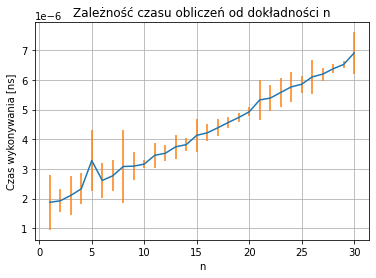

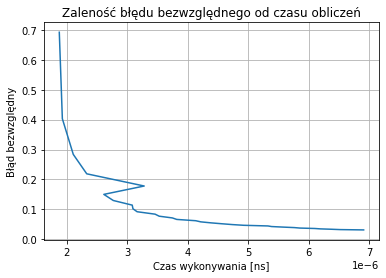

In [37]:
time = []
dev = []
ab = []
x = np.linspace(1,30,30)


for n in x:
    print('n: ', n)
    print('Timing: ')
    saved_timing = %timeit -r 15 -n 10 -o main.pi(int(n))
    time.append(saved_timing.average)
    dev.append(saved_timing.stdev)
    ab.append(main.absolut_error(main.pi(int(n)), np.pi))

fig, ax = plt.subplots()
ax.plot(x,time)
ax.errorbar(x, time, yerr=dev, ls="none")
plt.title("Zależność czasu obliczeń od dokładności n")
plt.xlabel("n")
plt.ylabel("Czas wykonywania [ns]")
plt.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(time, ab)
plt.title("Zaleność błędu bezwzględnego od czasu obliczeń")
plt.xlabel("Czas wykonywania [ns]")
plt.ylabel("Błąd bezwzględny")
plt.grid()
plt.show()
